# Steam Game Recommendation

import requirements:

In [1]:
import pandas as pd

In [2]:
games = pd.read_csv('data/games.csv')
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48844 entries, 0 to 48843
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          48844 non-null  int64  
 1   title           48844 non-null  object 
 2   date_release    48844 non-null  object 
 3   win             48844 non-null  bool   
 4   mac             48844 non-null  bool   
 5   linux           48844 non-null  bool   
 6   rating          48844 non-null  object 
 7   positive_ratio  48844 non-null  int64  
 8   user_reviews    48844 non-null  int64  
 9   price_final     48844 non-null  float64
 10  price_original  48844 non-null  float64
 11  discount        48844 non-null  float64
 12  steam_deck      48844 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.5+ MB


In [4]:
recommendations = pd.read_csv('data/recommendations.csv')
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,24170,0
1,304390,4,0,2017-02-17,False,11.5,1339,1
2,1085660,2,0,2019-11-17,True,336.5,110271,2
3,703080,0,0,2022-09-23,True,27.4,112510,3
4,526870,0,0,2021-01-10,True,7.9,11046,4


In [5]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585291 entries, 0 to 14585290
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 792.8+ MB


In [6]:
users = pd.read_csv('data/users.csv')
users.head()

,user_id,products,reviews
0,6924278,156,1
1,4358034,329,4
2,2340634,176,2
3,2524085,98,2
4,2798943,144,3


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7067002 entries, 0 to 7067001
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 161.8 MB


In [8]:
steam_games = pd.read_csv('data/steam_games.csv', sep=';')
steam_games.head()

C:\Users\Eric Bohner\AppData\Local\Temp\ipykernel_1984\819981650.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  steam_games = pd.read_csv('data/steam_games.csv', sep=';')


,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [9]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

In [10]:
steam_games['Positive Reviews']

0        201215
1            27
2          4032
3          1575
4             0
          ...  
55686        12
55687         2
55688        12
55689         2
55690        10
Name: Positive Reviews, Length: 55691, dtype: int64

In [11]:
steam_games['Owners']

0        10,000,000 .. 20,000,000
1                     0 .. 20,000
2              200,000 .. 500,000
3              100,000 .. 200,000
4                     0 .. 20,000
                   ...           
55686                 0 .. 20,000
55687                 0 .. 20,000
55688            20,000 .. 50,000
55689                 0 .. 20,000
55690                 0 .. 20,000
Name: Owners, Length: 55691, dtype: object

In [12]:
steam_games['Required Age'].unique()

array(['0', '15', '12', '18', '16', '17', '10', '7', '5', '180', '13',
       '3', '6', '14', 'MA 15+', '7+', '21+', 0, 18, 12, 17, 16, 13, 15,
       8, 14, 10, 3, 7, 6, 20, 9, 180, 35], dtype=object)

In [13]:
steam_games['Required Age'].value_counts()

0         32423
0         22607
15          156
18          123
15          108
18          100
17           22
16           20
16           18
12           17
17           16
12           15
13           14
13           12
14            6
10            4
14            4
8             3
10            3
180           3
6             3
3             2
9             1
20            1
6             1
7             1
MA 15+        1
7+            1
3             1
7             1
5             1
180           1
21+           1
35            1
Name: Required Age, dtype: int64

In [14]:
steam_games.duplicated().sum()

0

In [15]:
steam_games.loc[steam_games['Required Age'] == 'MA 15+'] = 15

In [16]:
steam_games['Required Age'].value_counts()

0      32423
0      22607
15       156
18       123
15       109
18       100
17        22
16        20
16        18
12        17
17        16
12        15
13        14
13        12
14         6
10         4
14         4
6          3
180        3
8          3
10         3
3          2
7          1
6          1
20         1
9          1
21+        1
7+         1
3          1
180        1
5          1
7          1
35         1
Name: Required Age, dtype: int64

In [17]:
steam_games.loc[steam_games['Required Age'] == '7+'] = 7
steam_games.loc[steam_games['Required Age'] == '21+'] = 21

In [18]:
steam_games['Required Age'].unique()

array(['0', '15', '12', '18', '16', '17', '10', '7', '5', '180', '13',
       '3', '6', '14', 15, 7, 21, 0, 18, 12, 17, 16, 13, 8, 14, 10, 3, 6,
       20, 9, 180, 35], dtype=object)

In [19]:
steam_games['Required Age'].value_counts()

0      32423
0      22607
15       156
18       123
15       109
18       100
17        22
16        20
16        18
12        17
17        16
12        15
13        14
13        12
14         6
10         4
14         4
6          3
180        3
8          3
10         3
7          2
3          2
6          1
20         1
9          1
21         1
3          1
180        1
5          1
7          1
35         1
Name: Required Age, dtype: int64

In [20]:
steam_games['Required Age'] = steam_games['Required Age'].astype(int)

In [21]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

In [22]:
steam_games['Release Date'] = pd.to_datetime(steam_games['Release Date'])

In [23]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App ID             55691 non-null  int64         
 1   Name               55691 non-null  object        
 2   Short Description  55654 non-null  object        
 3   Developer          55562 non-null  object        
 4   Publisher          55540 non-null  object        
 5   Genre              55530 non-null  object        
 6   Tags               55556 non-null  object        
 7   Type               55691 non-null  object        
 8   Categories         54721 non-null  object        
 9   Owners             55691 non-null  object        
 10  Positive Reviews   55691 non-null  int64         
 11  Negative Reviews   55691 non-null  int64         
 12  Price              55691 non-null  int64         
 13  Initial Price      55691 non-null  int64         
 14  Discou

In [24]:
steam_games['Languages'].nunique()

8625

In [25]:
steam_games['Platforms'].unique()

array(['windows, mac, linux', 'windows', 'windows, mac', 'windows, linux',
       'mac', 15, 7, 'linux', 21, 'mac, linux'], dtype=object)

In [26]:
steam_games['Platforms'].value_counts()

windows                41268
windows, mac, linux     6807
windows, mac            5951
windows, linux          1647
mac                       11
linux                      3
15                         1
7                          1
21                         1
mac, linux                 1
Name: Platforms, dtype: int64

In [27]:
steam_games.loc[steam_games['Platforms'] == 15]

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
10658,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,1970-01-01 00:00:00.000000015,15,15,15


In [28]:
drop_index = steam_games[steam_games['Platforms'].isin([7, 15, 21])].index

In [29]:
sg = steam_games.drop(drop_index)
sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55688 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App ID             55688 non-null  int64         
 1   Name               55688 non-null  object        
 2   Short Description  55651 non-null  object        
 3   Developer          55559 non-null  object        
 4   Publisher          55537 non-null  object        
 5   Genre              55527 non-null  object        
 6   Tags               55553 non-null  object        
 7   Type               55688 non-null  object        
 8   Categories         54718 non-null  object        
 9   Owners             55688 non-null  object        
 10  Positive Reviews   55688 non-null  int64         
 11  Negative Reviews   55688 non-null  int64         
 12  Price              55688 non-null  int64         
 13  Initial Price      55688 non-null  int64         
 14  Discou

In [30]:
sg['Platforms'].value_counts()

windows                41268
windows, mac, linux     6807
windows, mac            5951
windows, linux          1647
mac                       11
linux                      3
mac, linux                 1
Name: Platforms, dtype: int64

In [31]:
sg['Platforms'] = sg['Platforms'].map({
    'windows': 'windows',
    'windows, mac, linux': 'windows, mac, linux',
    'windows, mac': 'windows, mac',
    'windows, linux': 'windows, linux',
    'mac': 'windows, mac',
    'linux': 'windows, linux',
    'mac, linux': 'windows, mac, linux'
})

In [32]:
sg['Platforms'].value_counts()

windows                41268
windows, mac, linux     6808
windows, mac            5962
windows, linux          1650
Name: Platforms, dtype: int64

In [33]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55688 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App ID             55688 non-null  int64         
 1   Name               55688 non-null  object        
 2   Short Description  55651 non-null  object        
 3   Developer          55559 non-null  object        
 4   Publisher          55537 non-null  object        
 5   Genre              55527 non-null  object        
 6   Tags               55553 non-null  object        
 7   Type               55688 non-null  object        
 8   Categories         54718 non-null  object        
 9   Owners             55688 non-null  object        
 10  Positive Reviews   55688 non-null  int64         
 11  Negative Reviews   55688 non-null  int64         
 12  Price              55688 non-null  int64         
 13  Initial Price      55688 non-null  int64         
 14  Discou

In [34]:
sg.drop(columns=['Website', 'Header Image'], inplace=True)

In [35]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55688 entries, 0 to 55690
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App ID             55688 non-null  int64         
 1   Name               55688 non-null  object        
 2   Short Description  55651 non-null  object        
 3   Developer          55559 non-null  object        
 4   Publisher          55537 non-null  object        
 5   Genre              55527 non-null  object        
 6   Tags               55553 non-null  object        
 7   Type               55688 non-null  object        
 8   Categories         54718 non-null  object        
 9   Owners             55688 non-null  object        
 10  Positive Reviews   55688 non-null  int64         
 11  Negative Reviews   55688 non-null  int64         
 12  Price              55688 non-null  int64         
 13  Initial Price      55688 non-null  int64         
 14  Discou

In [36]:
sg['Genre'].value_counts()

Action, Indie                                                                                     3460
Casual, Indie                                                                                     3060
Action, Adventure, Indie                                                                          2783
Adventure, Indie                                                                                  2316
Action, Casual, Indie                                                                             1914
                                                                                                  ... 
Action, Adventure, Indie, Massively Multiplayer, Sports, Strategy                                    1
Action, Adventure, Casual, Massively Multiplayer, RPG                                                1
Animation & Modeling, Design & Illustration, Photo Editing, Video Production, Game Development       1
Action, Indie, Massively Multiplayer, Sports                             

In [37]:
distinct_genres = sg['Genre'].str.split(', ').explode().value_counts()
distinct_genres

Indie                    39681
Action                   23756
Casual                   22086
Adventure                21429
Strategy                 10895
Simulation               10836
RPG                       9533
Early Access              6145
Free to Play              3393
Sports                    2666
Racing                    2155
Massively Multiplayer     1460
Utilities                  682
Design & Illustration      406
Animation & Modeling       322
Education                  317
Video Production           247
Audio Production           195
Violent                    168
Software Training          164
Game Development           159
Photo Editing              105
Gore                        99
Web Publishing              89
Sexual Content              54
Nudity                      45
Accounting                  16
Movie                        1
Name: Genre, dtype: int64

In [38]:
import matplotlib.pyplot as plt

<Axes: >

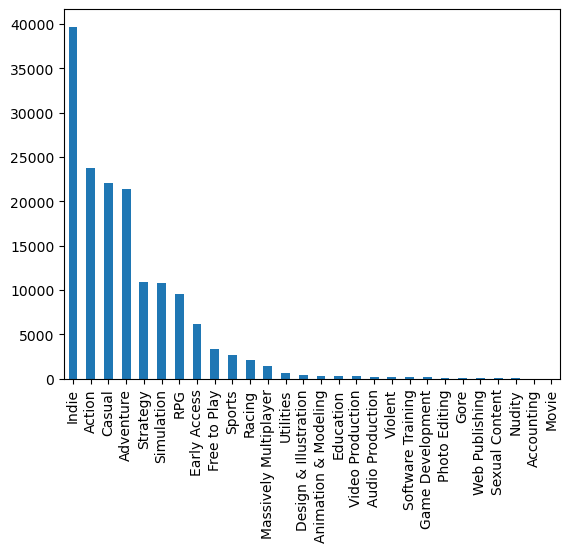

In [39]:
distinct_genres.plot(kind='bar')

In [40]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55688 entries, 0 to 55690
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App ID             55688 non-null  int64         
 1   Name               55688 non-null  object        
 2   Short Description  55651 non-null  object        
 3   Developer          55559 non-null  object        
 4   Publisher          55537 non-null  object        
 5   Genre              55527 non-null  object        
 6   Tags               55553 non-null  object        
 7   Type               55688 non-null  object        
 8   Categories         54718 non-null  object        
 9   Owners             55688 non-null  object        
 10  Positive Reviews   55688 non-null  int64         
 11  Negative Reviews   55688 non-null  int64         
 12  Price              55688 non-null  int64         
 13  Initial Price      55688 non-null  int64         
 14  Discou

In [42]:
sg['Owners'].value_counts()

0 .. 20,000                   38070
20,000 .. 50,000               7285
50,000 .. 100,000              3695
100,000 .. 200,000             2519
200,000 .. 500,000             2162
500,000 .. 1,000,000            932
1,000,000 .. 2,000,000          526
2,000,000 .. 5,000,000          335
5,000,000 .. 10,000,000          97
10,000,000 .. 20,000,000         41
20,000,000 .. 50,000,000         21
50,000,000 .. 100,000,000         4
200,000,000 .. 500,000,000        1
Name: Owners, dtype: int64

In [44]:
sg[sg['Owners'] == '200,000,000 .. 500,000,000']

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age
40006,570,Dota 2,"Every day, millions of players worldwide enter...",Valve,Valve,"Action, Free to Play, Strategy","Free to Play: 58679, MOBA: 19557, Multiplayer:...",game,"Multi-player, Valve Anti-Cheat enabled, Co-op,...","200,000,000 .. 500,000,000",1534895,317916,0,0,0,852995,"English, Bulgarian, Czech, Danish, Dutch, Finn...","windows, mac, linux",2013-07-09,0


In [45]:
pd.set_option('display.max_rows', None)

In [46]:
sg.head(30)

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",201215,5199,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000-11-01,0
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",27,5,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021-05-14,0
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",4032,646,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020-10-16,0
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",1575,115,1999,1999,0,76,English,"windows, mac",2020-10-14,0
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",0,1,199,199,0,0,Simplified Chinese,windows,2019-03-30,0
5,1000080,Zengeon,Zengeon is an anime infused Action RPG and Rog...,IndieLeague Studio,2P Games,"Action, Adventure, Indie, RPG","Action: 138, Indie: 128, RPG: 121, Adventure: ...",game,"Multi-player, Single-player, Steam Achievement...","100,000 .. 200,000",1018,462,799,1999,60,3,"Simplified Chinese, English, Traditional Chine...","windows, mac",2019-06-24,0
6,1000100,干支セトラ 陽ノ卷｜干支etc. 陽之卷,耐用年数を超えて綻びゆく都市風水を修復するため、次代の風水師候補に選ばれた主人公。 綻びから...,七月九日,Starship Studio,"Adventure, Indie, RPG, Strategy","Adventure: 20, Indie: 20, RPG: 20, Strategy: 2...",game,"Single-player, Steam Achievements, Steam Cloud","0 .. 20,000",18,6,1299,1299,0,0,"Japanese, Simplified Chinese, Traditional Chinese",windows,2019-01-24,0
7,1000110,Jumping Master(跳跳大咖),Jumping Master is a innovative casual competit...,重庆环游者网络科技,重庆环游者网络科技,"Action, Adventure, Casual, Free to Play, Massi...","Free to Play: 26, Massively Multiplayer: 25, A...",game,"Multi-player, Single-player, Co-op, Online PvP...","20,000 .. 50,000",50,34,0,0,0,0,"English, Simplified Chinese, Traditional Chinese",windows,2019-04-08,0
8,1000130,Cube Defender,Build turrets and destroy wave after wave of c...,Simon Codrington,Simon Codrington,"Casual, Indie","Casual: 31, Indie: 31, Tower Defense: 16, Sand...",game,"Single-player, Steam Achievements, Steam Leade...","0 .. 20,000",6,0,299,299,0,0,English,"windows, mac",2019-01-06,0
9,1000280,Tower of Origin2-Worm's Nest,As the protagonist，the Balrog Princess— HongYe...,Villain Role,Villain Role,"Indie, RPG","Sexual Content: 155, Mature: 150, Female Prota...",game,Single-player,"0 .. 20,000",32,12,1399,1399,0,0,"English, Simplified Chinese, Traditional Chinese",windows,2021-09-09,0
